In [1]:
import torch
from GuidedBackpropReLUModel import GuidedBackpropReLUModel
from datas.BacLoader import bacLoader
from datas.preprocess3d import TRAIN_AUGS_3D, TEST_AUGS_3D
from Densenet3d_nomaxpool import d169_3d
from RespondCam import RespondCam

""" python grad_cam.py <path_to_image>
1. Loads an image with opencv.
2. Preprocesses it for VGG19 and converts to a pytorch variable.
3. Makes a forward pass to find the category index with the highest score,
and computes intermediate activations.
Makes the visualization. """

# Can work with any model, but it assumes that the model has a
# feature method, and a classifier method,
# as in the VGG models in torchvision.
device = torch.device("cpu")
model = d169_3d(num_classes=18, sample_size=64, sample_duration=96)
grad_cam = RespondCam(model=model, hooks=["features", "denseblock2", "denselayer12", "conv1"], device=device)
gb_model = GuidedBackpropReLUModel(model=model, device=device)

data_path = "/data2/DW/180930_bac/valid40/"
train_loader = bacLoader(data_path + "train", 1, task="bac", sampler=False,
                            transform=TEST_AUGS_3D, aug_rate=0,
                            num_workers=1, shuffle=False, drop_last=True)

for input_, *_ in train_loader:
    break

target_index = None
cam_mask, predict = grad_cam(input_, target_index)

{'Enterobacter_cloacae': 2, 'Streptococcus_pneumoniae': 16, 'Acinetobacter_baumannii': 0, 'Enterococcus_faecalis': 3, 'Proteus_mirabilis': 8, 'Smarcescens': 11, 'Streptococcus_agalactiae': 14, 'Listeria_monocytogenes': 6, 'Escherichia_coli': 4, 'Staphylococcus_epidermidis': 13, 'Staphylococcus_aureus': 12, 'Micrococcus_luteus': 7, 'Bacillus_subtilis': 1, 'Smaltophilia': 10, 'Streptococcus_pyogenes': 17, 'Pseudomonas_aeruginosa': 9, 'Klebsiella_pneumoniae': 5, 'Streptococcus_anginosus': 15}
Dataset Dir :  /data2/DW/180930_bac/valid40/train len :  3322
grads_val :  (1, 128, 24, 24, 5)
target :  (1, 128, 24, 24, 5)
weights :  (1, 128)
Cam :  (128, 24, 24, 5)
Cam sum :  (24, 24, 5)


In [2]:
print(cam_mask.shape)

(96, 96, 5)


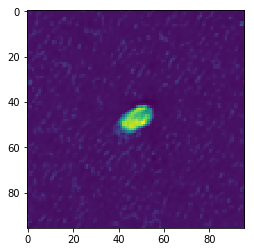

In [3]:
import matplotlib.pyplot as plt
plt.imshow(input_.numpy()[0, 0, : ,:, 10])

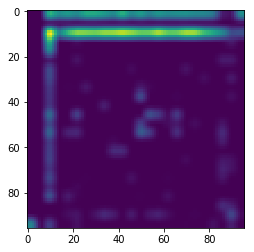

In [5]:
plt.imshow(cam_mask[:, :, 2])